In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN


In [2]:
data = pd.read_csv("../data/processed/model_data.csv")

#### Split Data into Training and Test

In [3]:
y = np.ravel(data[['status']].values)
X = data.iloc[:,1:].values

#### Modeling

In [4]:
models = ['KNN', 'SVC', 'NuSVC', 'Bayesian', 'RandomForest']
samples = ['random', 'smote', 'adasyn', 'observed']

In [5]:
def model_fit_score(model, sample, cv):
    if sample == 'random':
        ros = RandomOverSampler(random_state=21)
        X_res, y_res = ros.fit_resample(X, y)
    elif sample == 'smote':
        X_res, y_res = SMOTE().fit_resample(X, y)
    elif sample == 'adasyn':
        X_res, y_res = ADASYN().fit_resample(X, y)
    elif sample == 'observed':
        X_res = X
        y_res = y

    
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                            test_size=0.3, 
                                                            random_state=21, 
                                                            stratify=y_res)
    if model == 'KNN':
        steps = [('knn', KNeighborsClassifier())]
        parameters = {'knn__n_neighbors':np.arange(1,50), 
                      'knn__weights': ['uniform','distance'],
                       'knn__algorithm':['auto','ball_tree','kd_tree','brute']}
    elif model == 'SVC':
        steps = [('svc', SVC())]
        parameters = {'svc__C':np.logspace(-3, 2, 6), 
                      'svc__kernel':['linear','poly','rbf','sigmoid']}
    elif model == 'NuSVC':
        steps = [('nusvc', NuSVC())]
        parameters = {'nusvc__nu':np.arange(0.1,1, .01),
                      'nusvc__kernel':['linear','poly','rbf','sigmoid']}
    elif model == 'Bayesian':
        steps = [('bayes', GaussianNB())]
        parameters = {'bayes__var_smoothing': np.logspace(-9,9,19)}
    elif model == 'RandomForest':
        steps = [('rf', RandomForestClassifier())]
        parameters = {'rf__n_estimators': np.arange(10,100,10),
                     'rf__criterion':['gini','entropy'],
                     'rf__max_depth':np.arange(10,100,10)}
        

    pipeline = Pipeline(steps)
    
    cv = GridSearchCV(pipeline, param_grid=parameters, cv=cv)
    
    start_time = time.time()
    
    cv.fit(X_train, np.ravel(y_train))
        
    elapsed_time = time.time() - start_time
    
    print('Evaluation in {:.2f} seconds'.format(elapsed_time))
    
    print(str(model)+" Best params:", cv.best_params_)
    print(str(model)+" Best score:", cv.best_score_)
    
    y_pred = cv.predict(X_test)
    y_train_predict = cv.predict(X_train)
    
    print("Training Accuracy: {}".format(round(accuracy_score(y_train, y_train_predict), 2)))
    print(classification_report(y_test, y_pred, zero_division=0))
    plot_confusion_matrix(cv, X_test, y_test)
    plt.title(model + " Confusion Matrix")
    plt.show()

#### K-Nearest Neighbors | Original Data

Evaluation in 7.38 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 25, 'knn__weights': 'uniform'}
KNN Best score: 0.5152046783625732
Training Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.00      0.00      0.00         9
           2       0.38      0.53      0.44        15

    accuracy                           0.44        39
   macro avg       0.29      0.38      0.33        39
weighted avg       0.34      0.44      0.38        39



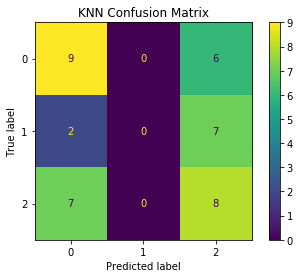

In [6]:
model_fit_score(models[0], samples[3], 5)

#### KNN | Random Oversampling

Evaluation in 8.26 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 32, 'knn__weights': 'distance'}
KNN Best score: 0.45714285714285713
Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        15
           1       0.53      0.67      0.59        15
           2       0.38      0.40      0.39        15

    accuracy                           0.47        45
   macro avg       0.47      0.47      0.46        45
weighted avg       0.47      0.47      0.46        45



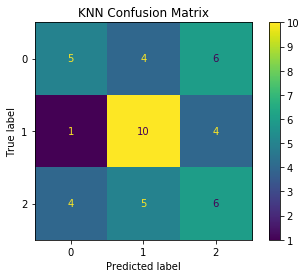

In [7]:
model_fit_score(models[0], samples[0], 5)

#### SVC | Original Data

Evaluation in 3.45 seconds
SVC Best params: {'svc__C': 100.0, 'svc__kernel': 'linear'}
SVC Best score: 0.49298245614035086
Training Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.57      0.44      0.50         9
           2       0.60      0.40      0.48        15

    accuracy                           0.62        39
   macro avg       0.60      0.59      0.58        39
weighted avg       0.61      0.62      0.59        39



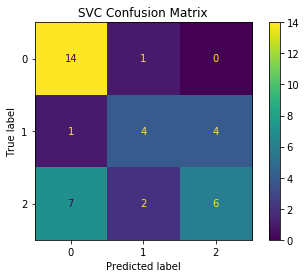

In [8]:
model_fit_score(models[1], samples[3], 5)

#### SVC | Random Oversampling

Evaluation in 2.01 seconds
SVC Best params: {'svc__C': 0.01, 'svc__kernel': 'linear'}
SVC Best score: 0.42857142857142855
Training Accuracy: 0.42
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.31      0.67      0.43        15
           2       0.00      0.00      0.00        15

    accuracy                           0.31        45
   macro avg       0.22      0.31      0.24        45
weighted avg       0.22      0.31      0.24        45



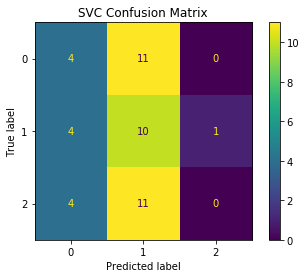

In [9]:
model_fit_score(models[1], samples[0], 3)

#### NuSVC | Original Data

Evaluation in 25.44 seconds
NuSVC Best params: {'nusvc__kernel': 'linear', 'nusvc__nu': 0.5799999999999997}
NuSVC Best score: 0.5157706093189964
Training Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.67      0.44      0.53         9
           2       0.60      0.40      0.48        15

    accuracy                           0.62        39
   macro avg       0.63      0.59      0.58        39
weighted avg       0.62      0.62      0.59        39



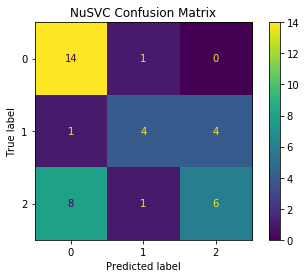

In [10]:
import warnings
warnings.filterwarnings("ignore")

model_fit_score(models[2], samples[3], 3)

#### NuSVC | Random Oversampling

Evaluation in 27.89 seconds
NuSVC Best params: {'nusvc__kernel': 'rbf', 'nusvc__nu': 0.6399999999999997}
NuSVC Best score: 0.5142857142857142
Training Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.38      0.33      0.36        15
           2       0.33      0.60      0.43        15

    accuracy                           0.38        45
   macro avg       0.44      0.38      0.36        45
weighted avg       0.44      0.38      0.36        45



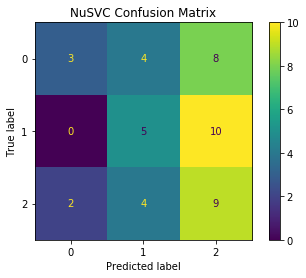

In [11]:
import warnings
warnings.filterwarnings("ignore")

model_fit_score(models[2], samples[0], 3)

#### Bayesian | Orignial Data

Evaluation in 0.20 seconds
Bayesian Best params: {'bayes__var_smoothing': 1e-06}
Bayesian Best score: 0.4827956989247311
Training Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        15
           1       0.67      0.22      0.33         9
           2       0.73      0.53      0.62        15

    accuracy                           0.62        39
   macro avg       0.65      0.56      0.55        39
weighted avg       0.65      0.62      0.58        39



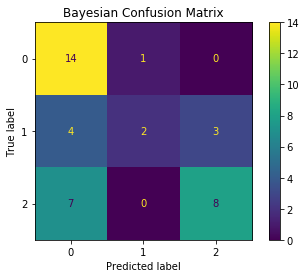

In [12]:
model_fit_score(models[3], samples[3], 3)

#### Bayesian | Random Oversampling

Evaluation in 0.11 seconds
Bayesian Best params: {'bayes__var_smoothing': 1e-05}
Bayesian Best score: 0.4476190476190476
Training Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.59      0.87      0.70        15
           1       0.50      0.40      0.44        15
           2       0.45      0.33      0.38        15

    accuracy                           0.53        45
   macro avg       0.52      0.53      0.51        45
weighted avg       0.52      0.53      0.51        45



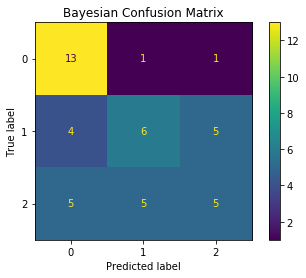

In [13]:
model_fit_score(models[3], samples[0], 3)

#### Random Forest | Original Data

Evaluation in 42.00 seconds
RandomForest Best params: {'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__n_estimators': 30}
RandomForest Best score: 0.5487455197132616
Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        15
           1       0.25      0.11      0.15         9
           2       0.50      0.47      0.48        15

    accuracy                           0.49        39
   macro avg       0.42      0.44      0.42        39
weighted avg       0.45      0.49      0.46        39



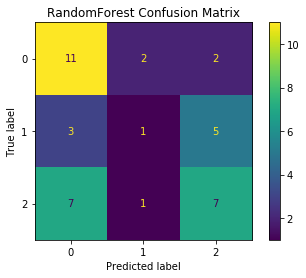

In [14]:
model_fit_score(models[4], samples[3], 3)

#### RandomForest | Random Oversampling

Evaluation in 42.69 seconds
RandomForest Best params: {'rf__criterion': 'gini', 'rf__max_depth': 70, 'rf__n_estimators': 70}
RandomForest Best score: 0.6
Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.79      0.73      0.76        15
           2       0.67      0.40      0.50        15

    accuracy                           0.69        45
   macro avg       0.70      0.69      0.67        45
weighted avg       0.70      0.69      0.67        45



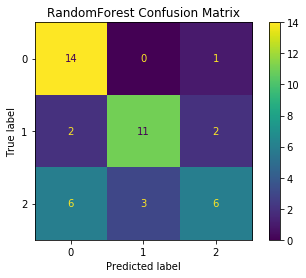

In [15]:
model_fit_score(models[4], samples[0], 3)

### Ensemble Learning | Random Oversampling

#### Voting Classifier

In [16]:
from sklearn.ensemble import VotingClassifier

In [17]:
estimators = []

model1 = KNeighborsClassifier(algorithm='auto', n_neighbors=31, weights='distance')
estimators.append(('knn',model1))
model2 = SVC(C=100, kernel='linear')
estimators.append(('svc',model2))
model3 = NuSVC(kernel='rbf', nu=0.6799999999999997)
estimators.append(('nusvc',model3))
model4 = GaussianNB(var_smoothing=1e-08)
estimators.append(('bayes',model4))
model5 = RandomForestClassifier(criterion='entropy', max_depth=60, n_estimators=90)
estimators.append(('rf',model5))

ensemble = VotingClassifier(estimators)

In [18]:
ros = RandomOverSampler(random_state=21)
X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=21,stratify=y_res)

In [19]:
start_time = time.time()
ensemble.fit(X_train,y_train)
elapsed_time = time.time() - start_time

In [20]:
y_pred = ensemble.predict(X_test)
y_train_predict = ensemble.predict(X_train)

Evaluation in 0.62 seconds
Training Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.79      0.73      0.76        15
           2       0.78      0.47      0.58        15

    accuracy                           0.71        45
   macro avg       0.73      0.71      0.70        45
weighted avg       0.73      0.71      0.70        45



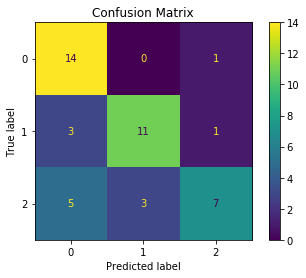

In [21]:
print('Evaluation in {:.2f} seconds'.format(elapsed_time))
print("Training Accuracy: {}".format(round(accuracy_score(y_train, y_train_predict),2)))
print(classification_report(y_test, y_pred, zero_division=0))
plot_confusion_matrix(ensemble, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

#### Bagging

In [22]:
from sklearn.ensemble import BaggingClassifier

In [23]:
start_time = time.time()
clf = BaggingClassifier(base_estimator=SVC(C=100, kernel='linear'),n_estimators=100,random_state=21)
clfcv = GridSearchCV(clf, param_grid={},cv=5)
clfcv.fit(X_train, y_train)
elapsed_time = time.time() - start_time

In [24]:
y_pred = clfcv.predict(X_test)
y_train_predict = clfcv.predict(X_train)

Evaluation in 219.11 seconds
Training Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.54      0.47      0.50        15
           2       0.56      0.33      0.42        15

    accuracy                           0.58        45
   macro avg       0.57      0.58      0.55        45
weighted avg       0.57      0.58      0.55        45



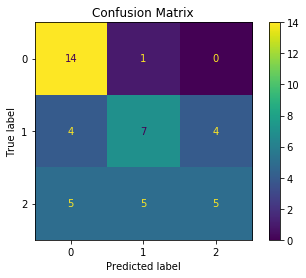

In [25]:
print('Evaluation in {:.2f} seconds'.format(elapsed_time))
print("Training Accuracy: {}".format(round(accuracy_score(y_train, y_train_predict),2)))
print(classification_report(y_test, y_pred, zero_division=0))
plot_confusion_matrix(clfcv, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()